In [1]:
import numpy as np

from pint import UnitRegistry
u = UnitRegistry()
u.load_definitions('./mis-defs.txt') 

import matplotlib.pyplot as plt

%matplotlib inline

# Funciones (Python)

Para definir una función se usa la palabra clave *def*. Los valores que devuelve la función se colocan con un return en la última linea. Viendo un ejemplo se puede entender la sintaxis. El bloque dentro de la función queda definido por la indentación (no hay llaves ni otro tipo de elemento para señalar el conjunto de instrucciones que componen la función.

Vamos a definir una función que permita calcular la evolución de los decaimientos de una muestra radiactiva

$N = N_0 \cdot e^{-\lambda t}$

En vez de usar $\lambda$ vamos a utilizar $\tau$

$$N = N_0 \cdot e^{-\frac{ln(2) \cdot t}{\tau}}$$


In [2]:
def n(n0, tau, t):
    exponente = - np.log(2) * t /tau
    return n0 * np.exp(exponente)

In [3]:
n0 = 100
tau = 10 * u('min')

Verificamos que ingresamos los valores adecuados (y que reconoce las unidades)

In [4]:
print(n0, tau)

100 10 minute


Podemos calcular el número de nucleos en distintos tiempos (variando t1):

In [5]:
t1 = 10 * u('min')
n_a = n(n0, tau, t1)
n_a

50.0 <Unit('dimensionless')>

## Uso de vectores y unidades para graficar

Generamos el vector de tiempos y le otorgamos unidades.

In [6]:
vector_t = np.arange(0.0, 10.0, 0.01) * u('min')

Verificamos algún elemento del vector

In [7]:
vector_t[10]

0.1 <Unit('minute')>

Generamos el vector de nucleos. Definimos nuevamente n0 y tau para tener las variables más cerca y poder cambiarlas más facilmente.

In [8]:
n0= 50
tau = 1 * u('min')

vector_n = n(n0, tau, vector_t)

Mostramos algún elemento para verificar...

In [9]:
vector_n[10]

46.65164957684037 <Unit('dimensionless')>

## Graficación

Graficamos del siguiente modo. **Da un aviso de que la gráfica se realiza habiendo quitado las unidades (no importa, nos sirve igual)**

/home/diego/.pyenv/versions/3.6.5/envs/jupyter/lib/python3.6/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


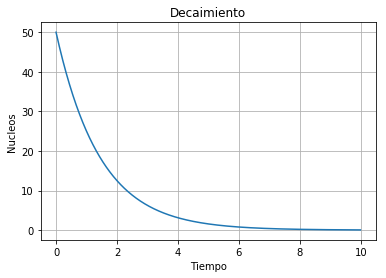

In [10]:
fig, ax = plt.subplots()
ax.plot(vector_t, vector_n)

ax.set(xlabel='Tiempo', ylabel='Nucleos', title='Decaimiento')
ax.grid()

plt.show()

## Algunas funciones útiles

In [27]:
def N(n0, tmedio, t):
    '''Calcula la exponencial decreciente que describen los núcleos radiactivos al decaer'''
    lmbd = np.log(2)/tmedio
    exponente = - lmbd * t
    return n0 * np.exp(exponente)

def A(a0, tmedio, t):
    '''Calcula la exponencial decreciente que describe la actividad'''
    lmbd = np.log(2)/tmedio
    exponente = - lmbd * t
    return a0 * np.exp(exponente)

def AtoN(a, tmedio):
    '''Convierte la actividad instantánea en el número de núcleos presentes en la muestra en ese instante'''
    lmbd = np.log(2)/tmedio
    return a/lmbd
    
def concAct(a, vol):
    '''Calcula la concentración de actividad en una solución
    a: actividad
    vol: volumen de solución'''
    return a/vol

def mostrar(numero,precision=2):
    '''Esta función permite darle formato científico a un número. El argumento
    *precision* es el número de decimales con que se verá.
    '''    
    print( "{:.{}e}".format(numero, precision ) )

### Ayuda

La documentación presente en el inicio de cada función se denomina docstring. La mayoría de los paquetes de Python tienen todas sus funciones con docstrings así que se puede invocar la ayuda de todas ellas en cualquier momento. Y se puede invocar de dos maneras:
1. Con *Shift+Tab* luego del nombre de la función. Se abre una ventanita que a su vez puede ser expandida pulsando sobre el símbolo + (que aparece en esa ventanita, arriba a la derecha).
2. Con la orden *help(nombreDeLaFunción)*

In [12]:
help(concAct)

Help on function concAct in module __main__:

concAct(a, vol)
    Calcula la concentración de actividad en una solución
    a: actividad
    vol: volumen de solución



### Uso de constantes del paquete Scipy.

De acuerdo al modo en que se importen las constantes, varía la sintaxis para invocarlas. En la celda siguiente se muestra cómo importar todas las constantes del paquete *scipy*, y asignar una sola de ellas a una variable.

In [13]:
from scipy import constants

NroDeAvogadro = constants.Avogadro
print(NroDeAvogadro)

6.022140857e+23


Podemos importar sólo la constante de nuestro interés.

In [14]:
from scipy.constants import Avogadro

NroDeAvogadro = Avogadro
print(NroDeAvogadro)

6.022140857e+23


Si importamos la librería *scipy* completa entonces las constantes también están disponibles, aunque es más largo el modo de llamarlas.

In [15]:
import scipy

NroDeAvogadro = scipy.constants.Avogadro
print(NroDeAvogadro)

6.022140857e+23


## Cálculo de masa de una muestra

In [16]:
from scipy.constants import Avogadro

def masa(n, masaMolar):
    '''Devuelve la masa correspondiente al número de nucleos presentes en la muestra (n) y la masa molar del RN'''
    return n * masaMolar / Avogadro

### Ejemplo

Un ejemplo para verificar que funciona. Masa de Tc99m presentes en una muestra cuya actividad es de 180 mCi:

In [17]:
# datos

A = 180 * u('mCi')
tmedio = 6.02 * u('hour')
masaTc99m = 99 * u('g')

Primero calculamos el número de nucleos y luego finalmente la masa correspondiente.

In [18]:
N = AtoN(A,tmedio)
m_muestra = masa(N, masaTc99m)

## Presentación de resultados

Las variables se pueden mostrar con distintas notaciones. A continuación algunos ejemplos:

* Sin procesar

In [19]:
m_muestra

2.56996862012158e-19 <Unit('gram * hour * millicurie')>

* en gramos y submúltiplos:

In [20]:
print(m_muestra.to('g'))
print(m_muestra.to('pg'))
print(m_muestra.to('ng'))

3.4231982020019444e-08 gram
34231.982020019444 picogram
34.23198202001944 nanogram


* usando la función *mostrar* para ver en notación científica con diverso número de cifras significativas:

In [25]:
mostrar(m_muestra.to('g'))
mostrar(m_muestra.to('pg'),5)
mostrar(m_muestra.to('ng'),3)

3.42e-08 gram
3.42320e+04 picogram
3.423e+01 nanogram
